In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# lebel encoding
def label_encode_categorical_columns(data, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        if column in data.columns:
            data[column] = label_encoder.fit_transform(data[column])
    return data

# Feature Scaling
def feature_scale_data(data, columns_for_scale):
    # Create a StandardScaler object
    scaler = MinMaxScaler()
    
    # Scale the numerical columns
    data[columns_for_scale] = scaler.fit_transform(data[columns_for_scale])
    
    return data

# Handling Outliers
def handle_outliers(data,columns):
    data_transformed = data.copy()
    data_transformed[columns] = np.log1p(data_transformed[columns])
    return data_transformed





# Splitting the Data
def split_data(data, target_col):
    # Assuming 'target_col' is the name of the target column
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
    return X_train, X_test, y_train, y_test

# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [3]:
data = pd.read_csv('Breast_Cancer.csv', index_col=False,)

data.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
# Step 2: Encode categorical variables with lebel encoder


categorical_columns = ['Race','N Stage', 'T Stage ','A Stage','differentiate','Marital Status', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status', 'Status']
data = label_encode_categorical_columns(data, categorical_columns)
data = pd.get_dummies(data, columns= [])
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [5]:
# Step 3: Scale features with minmax scaling
columns_to_scaled = ['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']
data = feature_scale_data(data,columns_to_scaled)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,2,1,0,0,0,1,3,1,0.021583,1,1,0.383333,0.000000,0.556604,0
1,0.512821,2,1,1,1,2,0,2,1,0.244604,1,1,0.216667,0.088889,0.575472,0
2,0.717949,2,0,2,2,4,0,2,1,0.446043,1,1,0.216667,0.133333,0.698113,0
3,0.717949,2,1,0,0,0,1,3,1,0.122302,1,1,0.016667,0.000000,0.783019,0
4,0.435897,2,1,1,0,1,1,3,1,0.287770,1,1,0.033333,0.000000,0.462264,0


In [6]:
#handle outlier with log transform
columns_to_transform = ['Age','Race','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months','N Stage', 'A Stage','differentiate','Marital Status', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status' ]
data = handle_outliers(data,columns_to_transform)
data.head()



,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.680244,1.098612,0.693147,0,0.000000,0.000000,0.693147,1.386294,0.693147,0.021353,0.693147,0.693147,0.324496,0.000000,0.442506,0
1,0.413976,1.098612,0.693147,1,0.693147,1.098612,0.000000,1.098612,0.693147,0.218818,0.693147,0.693147,0.196115,0.085158,0.454555,0
2,0.541131,1.098612,0.000000,2,1.098612,1.609438,0.000000,1.098612,0.693147,0.368831,0.693147,0.693147,0.196115,0.125163,0.529518,0
3,0.541131,1.098612,0.693147,0,0.000000,0.000000,0.693147,1.386294,0.693147,0.115382,0.693147,0.693147,0.016529,0.000000,0.578308,0
4,0.361790,1.098612,0.693147,1,0.000000,0.693147,0.693147,1.386294,0.693147,0.252912,0.693147,0.693147,0.032790,0.000000,0.379986,0


In [7]:
#Train and Test Split
output = 'Status'
X_train, X_test, y_train, y_test = split_data(data, output)


Training Accuracy:  0.9108418763591177
Testing Accuracy:  0.8906832298136645
Accuracy: 0.8906832298136645
Classification report
[[657  25]
 [ 63  60]]
0.8906832298136645
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       682
           1       0.71      0.49      0.58       123

    accuracy                           0.89       805
   macro avg       0.81      0.73      0.76       805
weighted avg       0.88      0.89      0.88       805



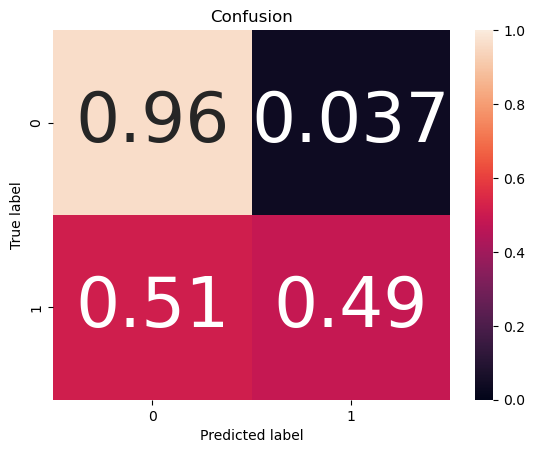

In [8]:
# create ada boost model
# Create an instance of the svc

adboost = AdaBoostClassifier()

#train model
adboost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adboost.predict(X_test)

#  Training Accuracy
print("Training Accuracy: ", adboost.score(X_train, y_train)) # Return the mean accuracy on the given data and actual labels

# Test Accuracy
print("Testing Accuracy: ", adboost.score(X_test, y_test))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report")

predictions = adboost.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=adboost.classes_, title='Confusion')

In [9]:
# Number of estimator
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2000, num = 2000)]

# Create the random grid

random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,
                      0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,
                      0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,
                      0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,
                      0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,
                      0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,
                      0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,
                      0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,
                      0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,
                      0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]
   
}


print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [ ]:
radaboost=AdaBoostClassifier()
# Randomized search on hyper parameters
r_adaboost_cv=RandomizedSearchCV(estimator=radaboost,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)

### fit the randomized model
r_adaboost_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ................learning_rate=0.2, n_estimators=409; total time=   2.1s
[CV] END ................learning_rate=0.2, n_estimators=409; total time=   2.0s
[CV] END ................learning_rate=0.2, n_estimators=409; total time=   2.0s
[CV] END ................learning_rate=0.29, n_estimators=89; total time=   0.4s
[CV] END ................learning_rate=0.29, n_estimators=89; total time=   0.4s
[CV] END ................learning_rate=0.29, n_estimators=89; total time=   0.4s
[CV] END ..............learning_rate=0.39, n_estimators=1656; total time=   8.5s
[CV] END ..............learning_rate=0.39, n_estimators=1656; total time=   8.3s
[CV] END ..............learning_rate=0.39, n_estimators=1656; total time=   8.3s
[CV] END ..............learning_rate=0.33, n_estimators=1616; total time=   8.1s
[CV] END ..............learning_rate=0.33, n_estimators=1616; total time=   8.1s
[CV] END ..............learning_rate=0.33, n_e

In [ ]:
r_adaboost_cv.best_params_

In [ ]:

# create ada boost model 
# Create an instance of the svc

adboost = AdaBoostClassifier(n_estimators=183,learning_rate=0.04)

#train model
adboost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adboost.predict(X_test)

#  Training Accuracy
print("Training Accuracy: ", adboost.score(X_train, y_train)) # Return the mean accuracy on the given data and actual labels

# Test Accuracy
print("Testing Accuracy: ", adboost.score(X_test, y_test))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report")

predictions = adboost.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=adboost.classes_, title='Confusion')

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'], # Check your class names in the CSV file. It should be 1, 2, 3, 4, 5 I think
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=adboost.predict_proba
)

exp.show_in_notebook(show_table=True)